# 01. 환경 설정

In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import scipy
import sklearn
import os
import chardet

# matplotlib 하위 모듈
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 환경에서 설치된 'Malgun Gothic' 폰트 경로 찾기
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
malgun_gothic_path = [f for f in font_path if 'malgun' in f.lower()][0]

# matplotlib 폰트 설정
plt.rcParams['font.size'] = 17.5
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.sans-serif'] = ['Malgun Gothic']

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 옵션 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# 버전 체크
# print(pd.__version__)          # 2.1.1
# print(np.__version__)          # 1.26.1
# print(sns.__version__)         # 0.13.0
# print(matplotlib.__version__)  # 3.8.0
# print(scipy.__version__)       # 1.11.3
# print(sklearn.__version__)     # 1.3.1
# print(chardet.__version__)     # 5.2.0

In [2]:
# Edit_data.csv의 감지된 인코딩은: EUC-KR 입니다.
# Edit_quality.csv의 감지된 인코딩은: UTF-8-SIG 입니다.
# Edit_train.csv의 감지된 인코딩은: UTF-8-SIG 입니다.

# 데이터 불러오기
path = './data/'

# Data = pd.read_csv(path + 'data_mean.csv', encoding='utf-8')  # A_01 부터 체크
# A_01 = Data.copy()

Quality = pd.read_excel(path + 'quality.xlsx') # B_01 부터 체크
B_01 = Quality.copy()

# Train = pd.read_csv(path + 'Edit_train.csv', encoding='utf-8-sig') # C_01 부터 체크
# C_01 = Train.copy()

In [3]:
A_01 = pd.read_csv('./data/encoded_data.csv')
A_01

,AN,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP
0,102410,71.8525,21.5964,99.9950,100.1259,69.3986,77.5296,59.7862,50.9374,70.1842,0.4500,0.0000,859.5986,859.9211,859.9669,860.0469,283.2863,280.1783,329.0108
1,102410,71.8610,19.9282,100.0244,100.1906,69.8181,78.5729,61.6286,51.4804,71.9949,0.4506,0.0000,857.8293,859.5417,859.8145,859.6880,282.5770,277.2757,329.0378
2,102410,75.6776,32.1592,98.8533,99.1460,68.4386,78.1099,61.5414,52.0196,72.0384,0.4503,0.0000,860.3380,859.7800,859.9810,859.7240,294.6580,272.5380,328.7340
3,102410,75.8656,30.8312,98.7918,99.1767,68.4999,77.5072,60.6663,52.6942,73.4815,0.4502,0.0000,860.3380,859.8420,859.9500,859.5990,294.7190,272.5380,328.6740
4,102410,73.6468,29.5274,98.7918,99.2075,68.4386,76.0262,61.1634,51.6915,71.6093,0.4502,0.0000,860.3510,859.7910,859.9910,859.7310,294.7210,272.5990,328.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939717,148069,61.2937,0.0940,99.9056,100.4870,67.1140,71.8356,60.7118,50.3777,76.3514,0.4471,0.0000,858.9860,859.4210,859.9300,859.4190,280.7980,272.1020,332.0580
2939718,148069,61.7260,0.2839,99.8440,100.4870,67.1140,77.1783,60.6722,55.0392,76.3017,0.4480,0.0000,858.9230,859.4210,859.7430,859.4190,280.8590,272.1630,332.0580
2939719,148069,61.6784,0.2057,99.7825,100.4870,67.1140,73.1729,62.1574,56.4989,76.2566,0.4487,0.0000,858.9860,859.3580,859.6810,859.4190,280.8590,272.1630,332.0580
2939720,148069,61.5148,0.1364,99.8440,100.4870,67.1140,73.8443,62.0722,54.8139,76.2158,0.4485,0.0000,858.9860,859.3580,859.7430,859.4190,280.9210,272.1630,332.0580


# 02. 데이터 전처리

## 02-01. 설비 데이터 정보 확인

In [4]:
Stand_A_01_01 = A_01.copy()
Stand_A_01_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 19 columns):
 #   Column     Dtype  
---  ------     -----  
 0   AN         int64  
 1   DZ1_OP     float64
 2   DZ2_OP     float64
 3   DZ1_TEMP   float64
 4   DZ2_TEMP   float64
 5   CLEAN      float64
 6   HDZ1_OP    float64
 7   HDZ2_OP    float64
 8   HDZ3_OP    float64
 9   HDZ4_OP    float64
 10  HDZ_CP     float64
 11  HDZ_CPM    float64
 12  HDZ1_TEMP  float64
 13  HDZ2_TEMP  float64
 14  HDZ3_TEMP  float64
 15  HDZ4_TEMP  float64
 16  SCZ1_TEMP  float64
 17  SCZ2_TEMP  float64
 18  STZ1_TEMP  float64
dtypes: float64(18), int64(1)
memory usage: 426.1 MB


In [5]:
# HDZ_CPM: 소입로 CP 모니터 값 0으로 채워져있음
Stand_A_01_01.describe()

,AN,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP
count,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000
mean,128442.2464,69.8933,20.4428,100.0063,100.0204,67.7185,75.6437,54.8624,53.8607,71.0906,0.4489,0.0000,859.2122,860.0021,860.0028,860.0060,283.9985,279.9258,331.8062
std,12637.0445,4.0138,5.2142,0.4356,0.3610,1.6305,25.1542,4.4291,2.6639,2.5554,0.0189,0.0000,3.6383,0.5578,0.3516,0.4548,9.5069,6.6077,0.7827
min,102410.0000,47.2532,0.0001,97.3421,97.8706,60.6244,0.0009,8.6200,0.0437,0.0062,0.0051,0.0000,840.2980,855.9290,858.2800,857.9920,266.2300,266.4260,328.1610
25%,119448.0000,68.4310,18.9173,99.8151,99.8905,66.5696,64.9811,53.3259,52.3898,69.6804,0.4484,0.0000,857.9560,859.7760,859.8290,859.8430,274.7680,273.5070,331.8670
50%,129889.0000,70.5156,21.2915,100.0020,100.0190,67.6973,82.1980,55.6654,53.8864,71.0470,0.4501,0.0000,859.5750,860.0220,860.0020,860.0000,284.5795,280.0120,332.0170
75%,139116.0000,72.3755,23.3827,100.1910,100.1610,68.9799,95.3496,57.5733,55.4152,72.4759,0.4517,0.0000,860.2580,860.2490,860.1710,860.1570,293.3370,286.3247,332.1410
max,148069.0000,87.2995,47.5395,102.4690,101.8430,71.4901,100.4158,77.2709,66.0150,87.3907,0.9091,0.0000,877.2280,866.0340,870.1190,882.1480,298.5300,291.6960,332.7170


## 02-02. 설비 데이터 전처리

In [6]:
# HDZ_CPM: mean, std, min, 25%, 50%, 75%, max == 0 이므로 무의미한 컬럼이므로 삭제하도록 함
# Stand_A_01_02 = Stand_A_01_01.drop(['HDZ_CPM'], axis=1)
# Stand_A_01_02.head(1)
Stand_A_01_02 = Stand_A_01_01.copy()
# Stand_A_01_02.drop(['TAG_MIN'], axis=1, inplace=True)

In [7]:
# AN(배정번호) 정수값으로 변환
Stand_A_01_03 = Stand_A_01_02.copy()
Stand_A_01_03['AN'].astype('int')

0          102410
1          102410
2          102410
3          102410
4          102410
            ...  
2939717    148069
2939718    148069
2939719    148069
2939720    148069
2939721    148069
Name: AN, Length: 2939722, dtype: int32

In [8]:
# 결측치 체크
Stand_A_01_03.isna().sum()

AN           0
DZ1_OP       0
DZ2_OP       0
DZ1_TEMP     0
DZ2_TEMP     0
CLEAN        0
HDZ1_OP      0
HDZ2_OP      0
HDZ3_OP      0
HDZ4_OP      0
HDZ_CP       0
HDZ_CPM      0
HDZ1_TEMP    0
HDZ2_TEMP    0
HDZ3_TEMP    0
HDZ4_TEMP    0
SCZ1_TEMP    0
SCZ2_TEMP    0
STZ1_TEMP    0
dtype: int64

## 02-02. Group By(설비 데이터)

In [9]:
Stand_A_02_01 = Stand_A_01_03.groupby(['AN']).agg(['mean', 'std'])
Stand_A_02_01.head()

DZ1_OP         DZ2_OP        DZ1_TEMP        DZ2_TEMP          CLEAN  \
          mean    std    mean    std     mean    std     mean    std    mean   
AN                                                                             
102410 72.2517 3.6961 21.3516 4.3459  99.9435 0.5939 100.0619 0.4835 69.6029   
102585 72.2106 3.3488 18.5143 2.7686  99.9911 0.5131 100.0583 0.3514 69.5768   
102930 70.7215 3.2310 20.9109 2.5813  99.9955 0.4726 100.0216 0.3430 69.5293   
103142 72.4244 2.6351 22.2500 2.4026 100.0051 0.3314 100.0097 0.2518 69.5370   
103675 72.7745 4.1592 21.8639 3.6220  99.9836 0.6553 100.0438 0.4707 69.3214   

              HDZ1_OP         HDZ2_OP        HDZ3_OP        HDZ4_OP         \
          std    mean     std    mean    std    mean    std    mean    std   
AN                                                                           
102410 0.8452 75.7128 22.9797 59.3326 1.7839 50.6810 1.4400 70.2494 2.5042   
102585 1.0599 74.8896 23.4055 59.1689 1.9203 52.0410 1.4744 70.6264 2.2401   
102930 1.0978 70.6982 23.6699 45.8490 2.1012 48.2630 1.4200 67.1297 2.1308   
103142 1.0642 77.3251 15.4610 46.0317 1.5804 50.5715 1.2434 69.4427 1.7861   
103675 0.9914 74.7697 23.5528 45.1690 1.5090 50.2551 1.7669 69.7689 2.7003   

       HDZ_CP        HDZ_CPM        HDZ1_TEMP        HDZ2_TEMP         \
         mean    std    mean    std      mean    std      mean    std   
AN                                                                      
102410 0.4505 0.0059  0.0000 0.0000  859.4866 3.5738  860.0123 0.4007   
102585 0.4502 0.0028  0.0000 0.0000  859.3835 2.9899  860.0040 0.3999   
102930 0.4493 0.0059  0.0000 0.0000  859.6422 2.8267  859.9879 0.3844   
103142 0.4498 0.0040  0.0000 0.0000  859.8549 1.5416  859.9955 0.2466   
103675 0.4500 0.0030  0.0000 0.0000  859.8178 3.6836  859.9567 0.2956   

       HDZ3_TEMP        HDZ4_TEMP        SCZ1_TEMP        SCZ2_TEMP         \
            mean    std      mean    std      mean    std      mean    std   
AN                                                                           
102410  860.0097 0.2816  860.0106 0.5534  282.5798 9.3700  280.1497 6.0333   
102585  859.9838 0.2338  859.9936 0.4807  282.9874 9.3812  279.6914 7.1094   
102930  859.9960 0.2419  860.0075 0.4184  283.3272 9.6781  279.3111 6.6638   
103142  859.9969 0.1886  860.0035 0.2967  282.8828 9.4954  279.2410 6.5374   
103675  860.0242 0.3190  860.0072 0.5712  283.5848 9.7036  277.5453 5.3659   

       STZ1_TEMP         
            mean    std  
AN                       
102410  329.0160 0.1227  
102585  328.9997 0.1006  
102930  329.1335 0.1201  
103142  329.0819 0.0977  
103675  329.0104 0.0899

In [10]:
chg_name = {'mean':'_AVG', 'std': '_Std'}
Stand_A_02_01.columns = list(map(lambda x: x[0] + chg_name[x[1]], Stand_A_02_01.columns))

Stand_A_02_01.reset_index(drop=False, inplace=True)

In [11]:
Stand_A_02_01.head(1)

,AN,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ_CPM_AVG,HDZ_CPM_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std
0,102410,72.2517,3.6961,21.3516,4.3459,99.9435,0.5939,100.0619,0.4835,69.6029,0.8452,75.7128,22.9797,59.3326,1.7839,50.6810,1.4400,70.2494,2.5042,0.4505,0.0059,0.0000,0.0000,859.4866,3.5738,860.0123,0.4007,860.0097,0.2816,860.0106,0.5534,282.5798,9.3700,280.1497,6.0333,329.0160,0.1227


In [12]:
Stand_A_02_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AN             136 non-null    int64  
 1   DZ1_OP_AVG     136 non-null    float64
 2   DZ1_OP_Std     136 non-null    float64
 3   DZ2_OP_AVG     136 non-null    float64
 4   DZ2_OP_Std     136 non-null    float64
 5   DZ1_TEMP_AVG   136 non-null    float64
 6   DZ1_TEMP_Std   136 non-null    float64
 7   DZ2_TEMP_AVG   136 non-null    float64
 8   DZ2_TEMP_Std   136 non-null    float64
 9   CLEAN_AVG      136 non-null    float64
 10  CLEAN_Std      136 non-null    float64
 11  HDZ1_OP_AVG    136 non-null    float64
 12  HDZ1_OP_Std    136 non-null    float64
 13  HDZ2_OP_AVG    136 non-null    float64
 14  HDZ2_OP_Std    136 non-null    float64
 15  HDZ3_OP_AVG    136 non-null    float64
 16  HDZ3_OP_Std    136 non-null    float64
 17  HDZ4_OP_AVG    136 non-null    float64
 18  HDZ4_OP_St

In [13]:
Stand_A_02_01.describe()

,AN,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ_CPM_AVG,HDZ_CPM_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std
count,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000
mean,128897.1912,69.9157,3.4417,20.7298,3.3683,100.0049,0.4564,100.0143,0.3705,67.7909,0.6131,75.3740,24.7287,55.0219,2.7603,53.9580,1.8415,71.0324,1.8243,0.4479,0.0076,0.0000,0.0000,859.2024,3.6300,860.0028,0.5662,860.0046,0.3458,860.0065,0.3527,284.0002,9.4146,280.0116,6.5338,331.7990,0.1351
std,12403.3939,1.9846,0.6965,3.6308,0.9283,0.0613,0.1134,0.1085,0.1057,1.5088,0.3310,6.3747,5.1966,3.3286,0.8542,1.7846,0.7529,1.4331,1.0584,0.0130,0.0178,0.0000,0.0000,0.5947,1.3104,0.0259,0.1800,0.0362,0.1206,0.0662,0.2736,0.7744,0.7155,0.8849,0.5921,0.7912,0.0578
min,102410.0000,62.8550,1.4448,4.3659,1.3597,99.3787,0.1049,98.8756,0.1068,64.6167,0.0561,51.4389,2.8599,43.3118,0.9948,47.3187,0.9463,66.4569,0.9170,0.3411,0.0013,0.0000,0.0000,856.8227,0.0947,859.8958,0.1577,859.9260,0.1210,859.9336,0.0765,280.7419,1.4646,277.5453,0.8054,328.8314,0.0489
25%,120467.7500,68.9563,2.9767,19.4381,2.6984,99.9958,0.3818,99.9997,0.2855,66.5693,0.3927,73.3252,22.1207,54.3702,2.2204,53.2812,1.5798,70.1344,1.6029,0.4500,0.0029,0.0000,0.0000,858.8637,2.7141,859.9936,0.4258,859.9942,0.2698,859.9951,0.2923,283.5877,9.3410,279.6067,6.3569,331.9165,0.1001
50%,130199.0000,69.8203,3.4235,21.2771,3.2868,100.0027,0.4446,100.0122,0.3692,67.8475,0.5080,76.1941,24.8843,55.6828,2.7285,54.1459,1.7663,71.0595,1.7228,0.4501,0.0036,0.0000,0.0000,859.1654,3.6305,860.0016,0.5633,859.9997,0.3356,860.0007,0.3213,283.9949,9.5009,279.9884,6.6200,332.0133,0.1201
75%,138982.5000,70.8399,3.8671,22.7128,3.8242,100.0178,0.5212,100.0367,0.4443,69.2259,0.7483,79.4139,27.7232,56.8676,3.2574,54.8650,1.9525,71.9492,1.9132,0.4502,0.0046,0.0000,0.0000,859.5559,4.5136,860.0107,0.6932,860.0052,0.3949,860.0058,0.3712,284.6124,9.6011,280.3901,6.8188,332.1073,0.1440
max,148069.0000,74.4516,5.1410,31.3201,7.3668,100.1588,0.7566,100.2492,0.7512,70.1284,2.0271,93.9462,40.1160,59.3326,9.0297,57.9061,9.8082,74.3959,13.6354,0.4532,0.1438,0.0000,0.0000,860.8697,7.4410,860.1843,1.0167,860.3091,1.3156,860.7152,3.3884,286.4391,10.1583,287.6195,7.2411,332.2805,0.4863


## 02-04. 품질 데이터 전처리

In [14]:
# 퀄리티 데이터에서 불필요한 컬럼 삭제하기
B_02 = B_01.copy()
B_02.drop(['작업일', '공정명', '설비명'], axis=1, inplace=True)
B_02.head(1)

,배정번호,양품수량,불량수량,총수량
0,102410,15160,3,15163


In [15]:
# 퀄리티 데이터 컬럼명 변경
Q_column_list = {
    '배정번호': 'AN',
    '양품수량': 'GQ',
    '불량수량': 'BQ',
    '총수량': 'TQ'
}

B_02.rename(columns=Q_column_list, inplace=True)
B_02

,AN,GQ,BQ,TQ
0,102410,15160,3,15163
1,102585,29892,10,29902
2,102930,59616,30,59646
3,103142,74730,13,74743
4,103675,14979,2,14981
...,...,...,...,...
131,147292,43765,12,43777
132,147546,59957,16,59973
133,147982,40981,12,40993
134,147996,30239,9,30248


## 02-05. Mergy(품질, 설비 데이터)

In [16]:
# Left join으로 퀄리티, 공정 데이터를 결합
Standard_Total = pd.merge(B_02, Stand_A_02_01, on='AN', how='left')
Standard_Total.head(5)

,AN,GQ,BQ,TQ,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ_CPM_AVG,HDZ_CPM_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std
0,102410,15160,3,15163,72.2517,3.6961,21.3516,4.3459,99.9435,0.5939,100.0619,0.4835,69.6029,0.8452,75.7128,22.9797,59.3326,1.7839,50.6810,1.4400,70.2494,2.5042,0.4505,0.0059,0.0000,0.0000,859.4866,3.5738,860.0123,0.4007,860.0097,0.2816,860.0106,0.5534,282.5798,9.3700,280.1497,6.0333,329.0160,0.1227
1,102585,29892,10,29902,72.2106,3.3488,18.5143,2.7686,99.9911,0.5131,100.0583,0.3514,69.5768,1.0599,74.8896,23.4055,59.1689,1.9203,52.0410,1.4744,70.6264,2.2401,0.4502,0.0028,0.0000,0.0000,859.3835,2.9899,860.0040,0.3999,859.9838,0.2338,859.9936,0.4807,282.9874,9.3812,279.6914,7.1094,328.9997,0.1006
2,102930,59616,30,59646,70.7215,3.2310,20.9109,2.5813,99.9955,0.4726,100.0216,0.3430,69.5293,1.0978,70.6982,23.6699,45.8490,2.1012,48.2630,1.4200,67.1297,2.1308,0.4493,0.0059,0.0000,0.0000,859.6422,2.8267,859.9879,0.3844,859.9960,0.2419,860.0075,0.4184,283.3272,9.6781,279.3111,6.6638,329.1335,0.1201
3,103142,74730,13,74743,72.4244,2.6351,22.2500,2.4026,100.0051,0.3314,100.0097,0.2518,69.5370,1.0642,77.3251,15.4610,46.0317,1.5804,50.5715,1.2434,69.4427,1.7861,0.4498,0.0040,0.0000,0.0000,859.8549,1.5416,859.9955,0.2466,859.9969,0.1886,860.0035,0.2967,282.8828,9.4954,279.2410,6.5374,329.0819,0.0977
4,103675,14979,2,14981,72.7745,4.1592,21.8639,3.6220,99.9836,0.6553,100.0438,0.4707,69.3214,0.9914,74.7697,23.5528,45.1690,1.5090,50.2551,1.7669,69.7689,2.7003,0.4500,0.0030,0.0000,0.0000,859.8178,3.6836,859.9567,0.2956,860.0242,0.3190,860.0072,0.5712,283.5848,9.7036,277.5453,5.3659,329.0104,0.0899


## 02-06 Mergy 데이터 파생변수 생성

In [17]:
# 종속변수를 만들기 위해 불량 수량 / 총 생산량 * 100을 통해 불량률 컬럼 생성
Standard_Total['BQ Rate'] = round(Standard_Total['BQ'] / Standard_Total['TQ'] * 100, 3)
Standard_Total.head(5)

,AN,GQ,BQ,TQ,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ_CPM_AVG,HDZ_CPM_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,BQ Rate
0,102410,15160,3,15163,72.2517,3.6961,21.3516,4.3459,99.9435,0.5939,100.0619,0.4835,69.6029,0.8452,75.7128,22.9797,59.3326,1.7839,50.6810,1.4400,70.2494,2.5042,0.4505,0.0059,0.0000,0.0000,859.4866,3.5738,860.0123,0.4007,860.0097,0.2816,860.0106,0.5534,282.5798,9.3700,280.1497,6.0333,329.0160,0.1227,0.0200
1,102585,29892,10,29902,72.2106,3.3488,18.5143,2.7686,99.9911,0.5131,100.0583,0.3514,69.5768,1.0599,74.8896,23.4055,59.1689,1.9203,52.0410,1.4744,70.6264,2.2401,0.4502,0.0028,0.0000,0.0000,859.3835,2.9899,860.0040,0.3999,859.9838,0.2338,859.9936,0.4807,282.9874,9.3812,279.6914,7.1094,328.9997,0.1006,0.0330
2,102930,59616,30,59646,70.7215,3.2310,20.9109,2.5813,99.9955,0.4726,100.0216,0.3430,69.5293,1.0978,70.6982,23.6699,45.8490,2.1012,48.2630,1.4200,67.1297,2.1308,0.4493,0.0059,0.0000,0.0000,859.6422,2.8267,859.9879,0.3844,859.9960,0.2419,860.0075,0.4184,283.3272,9.6781,279.3111,6.6638,329.1335,0.1201,0.0500
3,103142,74730,13,74743,72.4244,2.6351,22.2500,2.4026,100.0051,0.3314,100.0097,0.2518,69.5370,1.0642,77.3251,15.4610,46.0317,1.5804,50.5715,1.2434,69.4427,1.7861,0.4498,0.0040,0.0000,0.0000,859.8549,1.5416,859.9955,0.2466,859.9969,0.1886,860.0035,0.2967,282.8828,9.4954,279.2410,6.5374,329.0819,0.0977,0.0170
4,103675,14979,2,14981,72.7745,4.1592,21.8639,3.6220,99.9836,0.6553,100.0438,0.4707,69.3214,0.9914,74.7697,23.5528,45.1690,1.5090,50.2551,1.7669,69.7689,2.7003,0.4500,0.0030,0.0000,0.0000,859.8178,3.6836,859.9567,0.2956,860.0242,0.3190,860.0072,0.5712,283.5848,9.7036,277.5453,5.3659,329.0104,0.0899,0.0130


In [18]:
# 공정이 안전한지 위험한지 판단하기 위해 3사분위수를 기준으로 판단하자
Standard_Total['BQ Rate'].describe()

count   136.0000
mean      0.0370
std       0.0482
min       0.0000
25%       0.0127
50%       0.0220
75%       0.0460
max       0.3690
Name: BQ Rate, dtype: float64

### 02-06-01. Mergy 데이터 상관관계 분석

In [19]:
# Total_heatmap = Standard_Total.copy()

# def plot_correlation_heatmap(df):
#     # 데이터프레임의 상관계수 행렬을 계산
#     corr = df.corr()

#     # 상관계수 행렬의 절대값을 기준으로 내림차순 정렬
#     cols = corr.abs().sum().sort_values(ascending=False).index

#     # 정렬된 순서대로 상관계수 행렬 재배열
#     sorted_corr = corr.loc[cols, cols]

#     # 히트맵 그리기
#     plt.figure(figsize=(15, 15), dpi=600)
#     sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={'size': 6})
    
#     # x, y 축의 텍스트 크기 조절
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.title("Feature Correlation Heatmap")
#     plt.show()

# plt.tight_layout()
# plot_correlation_heatmap(Total_heatmap.drop(['AN', 'GQ', 'BQ', 'TQ'], axis=1))

In [20]:
# Defective Stage: 불량 단계
# 'BQ Rate' 컬럼의 값이 0.46보다 크거나 같으면 1, 작으면 0을 'DS' 컬럼에 할당
Standard_Total['DS'] = np.where(Standard_Total['BQ Rate'] >= 0.046, '위험', '안전')

# 불량단계 안전 0은 101개, 위험 1은 35개 배정번호에서 일어났다.
Standard_Total['DS'].value_counts()

# 필요없는 컬럼 삭제
Standard_Total.drop(['AN', 'GQ', 'BQ', 'TQ', 'BQ Rate'], axis=1, inplace=True)

In [26]:
Standard_Total.head(1)

,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ_CPM_AVG,HDZ_CPM_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,DS
0,72.2517,3.6961,21.3516,4.3459,99.9435,0.5939,100.0619,0.4835,69.6029,0.8452,75.7128,22.9797,59.3326,1.7839,50.6810,1.4400,70.2494,2.5042,0.4505,0.0059,0.0000,0.0000,859.4866,3.5738,860.0123,0.4007,860.0097,0.2816,860.0106,0.5534,282.5798,9.3700,280.1497,6.0333,329.0160,0.1227,안전


# 03. 모델 데이터셋 전처리 및 분할

## 03-01. 데이터셋 로딩 및 라벨인코딩

In [21]:
# ==================== 데이터셋 로딩 및 전처리(라벨 인코딩) ==================== #
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터셋 로드
X = Standard_Total.drop('DS', axis=1)
y = Standard_Total['DS']

# Y(종속변수) 데이터셋 로드 및 라벨 인코딩
# 라벨 인코더를 이용해 종속변수를 수치 범주 데이터 0과 1로 변환
le = LabelEncoder()
y_trans = le.fit_transform(y)
print(le.classes_)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)

['안전' '위험']


# 04. 모델 구현 및 성능평가

## 04-01. RandomForest 모델 학습 및 평가

In [22]:
# ==================== 파이프 라인 ==================== #
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# 파이프라인 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=5)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# MinMax, Standard, Robust Scaler
# 위 3가지를 동일 조건하에 학습 시켜보았지만 학습데이터가 평균, 표준편차로 이루어진
# 오차 범위가 작은 데이터이다 보니 이상치에 따른 정확도 변화량이 없었음

# 모델 학습
pipeline.fit(X_train, y_train)

# ==================== 모델 평가:  ==================== #
from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.33      0.12      0.18         8

    accuracy                           0.68        28
   macro avg       0.53      0.51      0.49        28
weighted avg       0.61      0.68      0.62        28



## 04-02. XGBoost 모델 학습 및 평가

In [23]:
# ==================== 파이프 라인 ==================== #
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# 파이프라인 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', RFECV(estimator=XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='error', use_label_encoder=False, random_state=42), 
                               step=2, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=0)),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='error', use_label_encoder=False, random_state=42))
])

# 모델 학습
pipeline.fit(X_train, y_train)

# ==================== 모델 평가:  ==================== #
from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       0.00      0.00      0.00         8

    accuracy                           0.71        28
   macro avg       0.36      0.50      0.42        28
weighted avg       0.51      0.71      0.60        28



C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 04-02-01. XGBoost 오버샘플링
- SMOTE 기법이 가장 모델의 성능을 끌어올리고 있으므로 채택하려 함

#### 04-02-01-01. XGBoost / RandomOverSampler(부적합)
- Random Over-sampling: 소수 클래스의 샘플을 무작위로 복제하여 데이터의 균형을 맞춥니다.
- 이 방법은 구현하기 쉽지만, 과적합(overfitting)을 일으킬 위험이 있습니다.

In [24]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline as ImbalancedPipeline

# # 랜덤 오버 샘플러 인스턴스 생성
# ros = RandomOverSampler(random_state=42)

# # 불균형 처리 파이프라인 생성
# pipeline = ImbalancedPipeline([
#     # 데이터 리샘플링: 소수 클래스의 샘플을 다수 클래스 수준으로 증가
#     ('resampler', ros),
    
#     # 특성 스케일링: 각 특성의 평균을 0, 분산을 1로 조정
#     ('scaler', StandardScaler()),
    
#     # 재귀적 특성 제거: 최적의 특성만 선택
#     ('feature_selector', RFECV(
#         estimator=XGBClassifier(
#             n_estimators=100,
#             max_depth=3,
#             learning_rate=0.01,
#             eval_metric='error',
#             use_label_encoder=False,
#             random_state=42
#         ), 
#         step=2,
#         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#         verbose=0
#     )),
    
#     # 분류기: XGBoost 모델
#     ('classifier', XGBClassifier(
#         n_estimators=100,
#         max_depth=3,
#         learning_rate=0.01,
#         eval_metric='error',
#         use_label_encoder=False,
#         random_state=42
#     ))
# ])

# # 모델 학습
# pipeline.fit(X_train, y_train)

# # 예측
# y_pred = pipeline.predict(X_test)

# # 모델 평가
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy: {:.2f}".format(accuracy))
# print("Classification Report:\n", classification_rep)

04-02-01. XGBoost / RandomOverSampler(부적합)

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.30      0.38      0.33         8

    accuracy                           0.57        28
   macro avg       0.51      0.51      0.51        28
weighted avg       0.60      0.57      0.58        28

#### 04-02-01-02. XGBoost / SMOTE(적합)
- 소수 클래스 샘플 중 다수 클래스 샘플과 가까이 있는 '경계에 위치한' 샘플에 대해서만 SMOTE를 적용합니다.

In [28]:
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 불균형 처리 파이프라인 생성
pipeline = ImbalancedPipeline([
    # 데이터 리샘플링: SMOTE를 사용하여 소수 클래스의 샘플을 합성
    ('resampler', smote),
    
    # 특성 스케일링
    ('scaler', StandardScaler()),
    
    # 재귀적 특성 제거
    ('feature_selector', RFECV(
        estimator=XGBClassifier(
            n_estimators=100,
            max_depth=3,
            learning_rate=0.01,
            eval_metric='logloss',  # 'error' 메트릭 대신 'logloss' 사용
            use_label_encoder=False,
            random_state=42
        ), 
        step=2,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=0
    )),
    
    # 분류기
    ('classifier', XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        eval_metric='logloss',  # 'error' 메트릭 대신 'logloss' 사용
        use_label_encoder=False,
        random_state=42
    ))
])

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.33      0.25      0.29         8

    accuracy                           0.64        28
   macro avg       0.53      0.53      0.52        28
weighted avg       0.61      0.64      0.63        28



##### XGBoost / SMOTE 01. 파라미터 값 조정
sampling_strategy: 소수 클래스 샘플을 생성하는 비율을 결정합니다. 기본값은 'auto'로, 소수 클래스의 샘플 수를 다수 클래스의 샘플 수와 같게 만듭니다.
0과 1 사이의 부동소수점 값이나, 'minority', 'not majority', 'auto' 중 하나를 문자열로 지정할 수 있습니다.

random_state: 랜덤 번호 생성기의 시드 값을 설정합니다. 이는 결과의 재현 가능성을 위해 사용됩니다.

k_neighbors: 각 소수 클래스 샘플에 대해 SMOTE 알고리즘이 고려할 가장 가까운 이웃의 수입니다. 기본값은 5입니다.

n_jobs: 병렬 처리에 사용할 CPU 코어의 수를 설정합니다. 기본값은 1이며, -1로 설정하면 모든 프로세서가 사용됩니다.

m_neighbors: SMOTE의 변종 중 하나인 'SVM-SMOTE'에서 사용되는 
라미터입니다. 모든 소수 클래스 샘플에 대해 Minkowski 거리에 따라 가장 가까운 이웃을 찾는 데 사용됩니다.

out_step: 'SMOTE-NC'에서 사용되는 파라미터로, 범주형 특성의 이웃을 찾을 때의 step size를 결정합니다.

kind: 사용할 SMOTE 변종을 지정하는 문자열입니다. 'regular', 'borderline1', 'borderline2', 'svm' 중 하나를 선택할 수 있습니다.

svm_estimator: 'SVM-SMOTE'에서 사용되는 SVM 모델 객체를 지정합니다. 모델 객체를 지정합니다. 모델 객체를 지정합니다. 모델 객체를 지정합니다.

###### SMOTE 01-01. sampling_strategy
- sampling_strategy의 수치값을 조정하며 적정값을 찾아보자

In [29]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
smote = SMOTE(sampling_strategy=0.7, random_state=42)

# 불균형 처리 파이프라인 생성
pipeline = ImbalancedPipeline([
    # 데이터 리샘플링: SMOTE를 사용하여 소수 클래스의 샘플을 합성
    ('resampler', smote),
    
    # 특성 스케일링
    ('scaler', StandardScaler()),
    
    # 재귀적 특성 제거
    ('feature_selector', RFECV(
        estimator=XGBClassifier(
            n_estimators=100,
            max_depth=3,
            learning_rate=0.01,
            eval_metric='logloss',  # 'error' 메트릭 대신 'logloss' 사용
            use_label_encoder=False,
            random_state=42
        ), 
        step=2,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=0
    )),
    
    # 분류기
    ('classifier', XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        eval_metric='logloss',  # 'error' 메트릭 대신 'logloss' 사용
        use_label_encoder=False,
        random_state=42
    ))
])

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.38      0.38      0.38         8

    accuracy                           0.64        28
   macro avg       0.56      0.56      0.56        28
weighted avg       0.64      0.64      0.64        28



#### 04-02-01-03. XGBoost / SVMSMOTE(보류)
- Support Vector Machine (SVM)을 사용하여 소수 클래스 샘플과 다수 클래스 샘플의 결정 경계를 찾고, 경계 근처의 소수 클래스 샘플에 대해 SMOTE를 적용합니다.

In [30]:
# from imblearn.over_sampling import SVMSMOTE

# # SVMSMOTE 인스턴스 생성
# svmsmote = SVMSMOTE(random_state=42)

# # 불균형 처리 파이프라인 생성
# pipeline = ImbalancedPipeline([
#     # 데이터 리샘플링: SVMSMOTE를 사용하여 소수 클래스의 샘플을 합성
#     ('resampler', svmsmote),
    
#     # 특성 스케일링
#     ('scaler', StandardScaler()),
    
#     # 재귀적 특성 제거
#     ('feature_selector', RFECV(
#         estimator=XGBClassifier(
#             n_estimators=100,
#             max_depth=3,
#             learning_rate=0.01,
#             eval_metric='logloss',
#             use_label_encoder=False,
#             random_state=42
#         ), 
#         step=2,
#         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#         verbose=0
#     )),
    
#     # 분류기
#     ('classifier', XGBClassifier(
#         n_estimators=100,
#         max_depth=3,
#         learning_rate=0.01,
#         eval_metric='logloss',
#         use_label_encoder=False,
#         random_state=42
#     ))
# ])

# # 모델 학습
# pipeline.fit(X_train, y_train)

# # 예측
# y_pred = pipeline.predict(X_test)

# # 모델 평가
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy: {:.2f}".format(accuracy))
# print("Classification Report:\n", classification_rep)

04-02-03. XGBoost / SVMSMOTE(보류)

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.36      0.50      0.42         8

    accuracy                           0.61        28
   macro avg       0.56      0.57      0.56        28
weighted avg       0.65      0.61      0.62        28

#### 04-02-01-04. XGBoost / Borderline-SMOTE(부적합)
- 소수 클래스 샘플 중 다수 클래스 샘플과 가까이 있는 '경계에 위치한' 샘플에 대해서만 SMOTE를 적용합니다.

In [31]:
# from imblearn.over_sampling import BorderlineSMOTE

# # Borderline-SMOTE 인스턴스 생성
# borderline_smote = BorderlineSMOTE(random_state=42)

# # 불균형 처리 파이프라인 생성
# pipeline = ImbalancedPipeline([
#     # 데이터 리샘플링: Borderline-SMOTE를 사용하여 소수 클래스의 샘플을 합성
#     ('resampler', borderline_smote),
    
#     # 특성 스케일링
#     ('scaler', StandardScaler()),
    
#     # 재귀적 특성 제거
#     ('feature_selector', RFECV(
#         estimator=XGBClassifier(
#             n_estimators=100,
#             max_depth=3,
#             learning_rate=0.01,
#             eval_metric='logloss',
#             use_label_encoder=False,
#             random_state=42
#         ), 
#         step=2,
#         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#         verbose=0
#     )),
    
#     # 분류기
#     ('classifier', XGBClassifier(
#         n_estimators=100,
#         max_depth=3,
#         learning_rate=0.01,
#         eval_metric='logloss',
#         use_label_encoder=False,
#         random_state=42
#     ))
# ])

# # 모델 학습
# pipeline.fit(X_train, y_train)

# # 예측
# y_pred = pipeline.predict(X_test)

# # 모델 평가
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy: {:.2f}".format(accuracy))
# print("Classification Report:\n", classification_rep)

04-02-04. XGBoost / Borderline-SMOTE(부적합)

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.27      0.38      0.32         8

    accuracy                           0.54        28
   macro avg       0.49      0.49      0.48        28
weighted avg       0.58      0.54      0.55        28

# 05. 채택된 모델 성능 시각화

## 05-01. Confusion Matrix
혼동 행렬은 실제 값과 예측 값이 얼마나 잘 일치하는지 보여주는 행렬입니다.<br>
이를 통해 모델의 성능을 쉽게 파악할 수 있고, 특히 불균형 데이터셋에 대해 어떤 클래스에 대해 모델이 더 잘 혹은 못 예측하는지 확인할 수 있습니다.

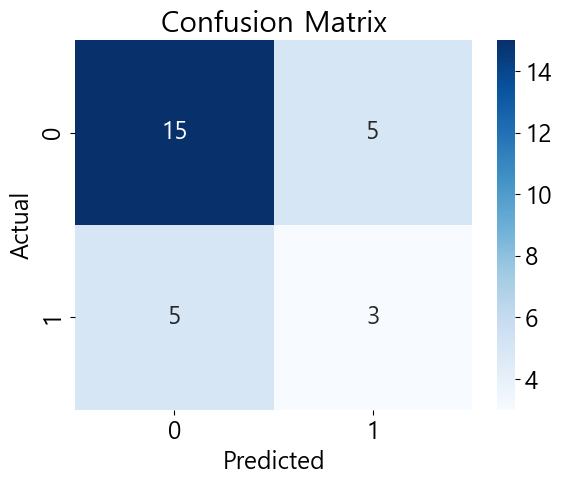

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 05-02. ROC Curve 및 AUC Score
ROC 곡선은 여러 임계값에서의 모델의 성능을 시각화하며, AUC 점수는 ROC 곡선 아래의 면적을 측정합니다.<br>
이는 모델의 성능을 하나의 숫자로 요약하여 제공합니다.

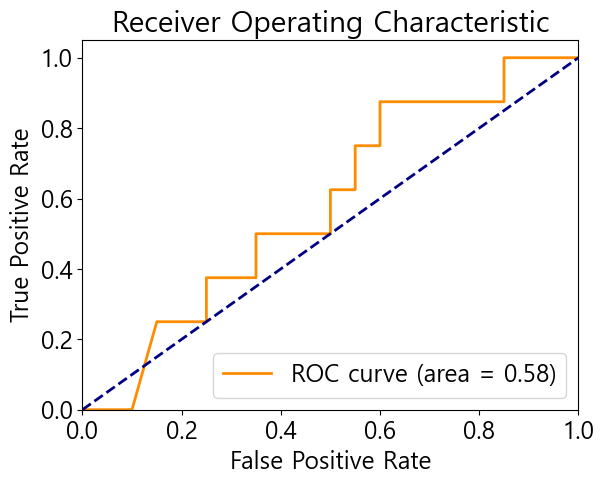

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 05-03. Precision-Recall Curve
정밀도와 재현율을 동시에 고려하여 모델의 성능을 평가할 수 있습니다.<br>
특히 불균형 데이터셋에서 유용합니다.

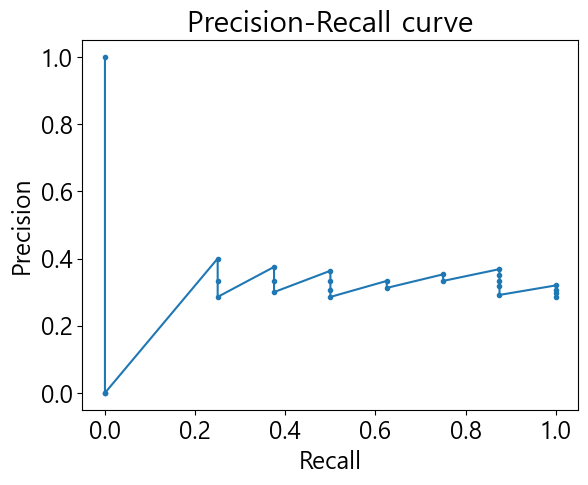

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

## 05-04. Feature Importance
모델이 어떤 특성을 중요하게 여기는지 시각화합니다.

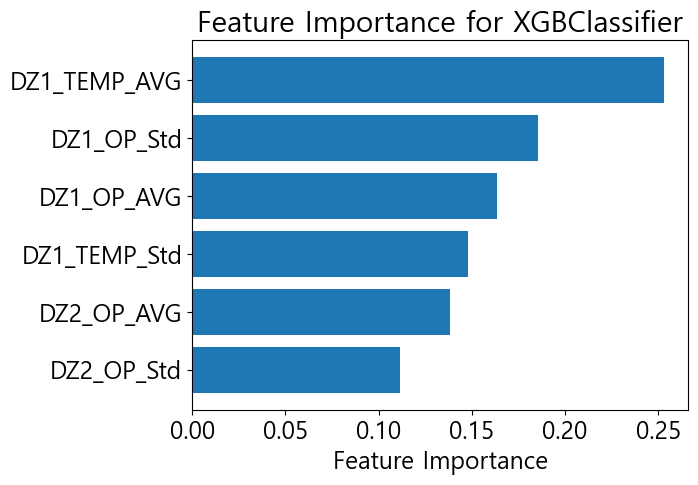

In [35]:
importance = pipeline.named_steps['classifier'].feature_importances_
indices = importance.argsort()

plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), X_train.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBClassifier')
plt.show()